In [4]:
from utilities import PlotComp
from GEF import GEF
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd
import numpy as np
import os
import sys

In [5]:
omega = 3.814203717684728e-05

In [6]:
#models = [-1.0, 1.0, "mix"]

directory = 'Out/GEF_Beta25.0_SE'
alpha = 0.
Mpl = 1.
beta = 25.
M = 6e-6*Mpl
phi0 = 15.55*Mpl
dphidt0 = -np.sqrt(2/3)*M*Mpl
ini = {"phi":phi0, "dphi":dphidt0, "delta":1.0, "rhoChi":0.0}
ntr = 1

In [7]:
setups = ["Old","KDep"]
pars = ["N","E","B","G","rhoChi"]
models = [1.0, -1.0, "mix"]
results = dict(zip(setups, [dict(zip([str(model) for model in models],
                                     [dict(zip(pars, [None for p in pars])) for m in models]))
                            for s in setups]))
for setup in setups:
    if setup == "Old":
        filesetup = ""
    elif setup == "KDep":
        filesetup = "_KDep_1it"
    elif setup == "Del1":
        filesetup = "_Del1"
    else:
        print("This is not a valid Setup")
        sys.exit()
    for model in models:
        file = directory + str(model) + filesetup + ".dat"
        SE = model
        H = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=0, approx=True)
        H.LoadData(file)
        H.Unitful()
        for p in pars:
            results[setup][str(model)][p] = abs(H.vals[p])

In [11]:
def SetupAxis(down, up, nticks, scale):
    step = lambda up, down, ntick: abs(up-down)/(ntick-1)
    if scale=="log":
        ymin = np.log10(down)
        ymax = np.log10(up)
        stepsize = step(ymin, ymax, nticks)
        ticks = np.arange(ymin, ymax+stepsize/2, stepsize)
        for i in range(ticks.size):
            scale = int(ticks[i])
            ticks[i] = np.round(10**(ticks[i]-scale), 1)*10**(scale)
        ticksmin = 10**(np.arange(ymin+stepsize/2, ymax, stepsize))
        down = 10**(ymin-stepsize/4)
        up = 10**(ymax+stepsize/4)
    elif scale=="linear":
        ymin = down
        ymax = up
        stepsize = step(ymin, ymax, nticks)
        ticks = np.arange(ymin, ymax+stepsize/2, stepsize)
        ticksmin = np.arange(ymin+stepsize/2, ymax, stepsize)
        down = (ymin-stepsize/4)
        up = (ymax+stepsize/4)
    else:
        print(scale + " is not a valid choice")
        return None, None, None, None
    return down, up, ticks, ticksmin

def ConfigurePlot(ax, xdown, xup, ydown, yup, nxtick=5, nytick=5, xscale="linear", yscale="linear",
                  minorx=True, minory=True):
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    step = lambda up, down, ntick: (up-down)/(ntick-1)
    ydown, yup, yticks, yticksmin = SetupAxis(ydown, yup, nytick, yscale)
    xdown, xup, xticks, xticksmin = SetupAxis(xdown, xup, nxtick, xscale)
    #print(yticks)
    ax.set_ylim(ydown, yup)
    ax.set_xlim(xdown, xup)
    ax.set_xticks(xticks)
    if (yscale=="linear"):
        ax.set_yticks(yticks)
    if minorx:
        ax.set_xticks(xticksmin, minor=True)
    if minory and yscale=="linear":
        ax.set_yticks(yticksmin, minor=True)
    return
    

[]

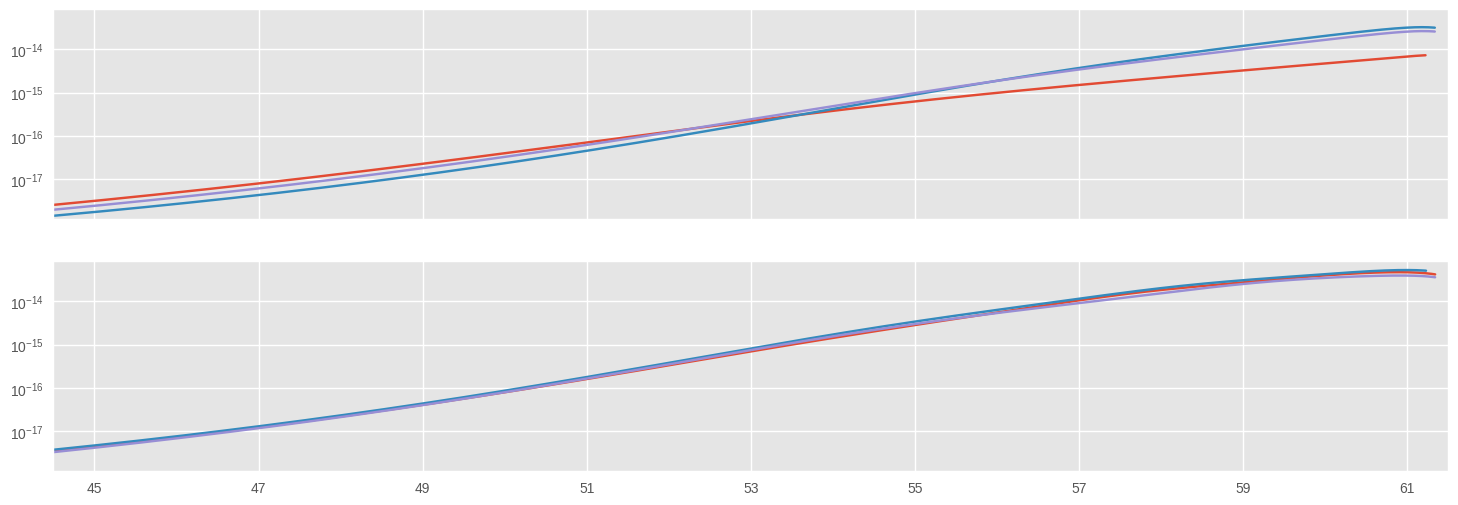

In [30]:
plt.style.use('ggplot')

fig, ax = plt.subplots(len(setups), figsize=(18,6), sharex=True)

Nlim = [45, 61, 9]
limdic = {"E":[5e-17, 2e-14, 4], "B":[5e-17, 2e-14, 4], "G":[5e-17, 2e-14, 4], "rhoChi":[2e-18, 5e-14, 6]}

for i in range(len(setups)):
    s= setups[i]
    p = pars[4]
    for m in models:
        m = str(m)
        ax[i].semilogy(results[s][m]["N"], results[s][m][p])
        ConfigurePlot(ax[i], Nlim[0], Nlim[1], limdic[p][0], limdic[p][1],
                      nxtick=Nlim[2], nytick=limdic[p][2], yscale="log")
            
plt.plot()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

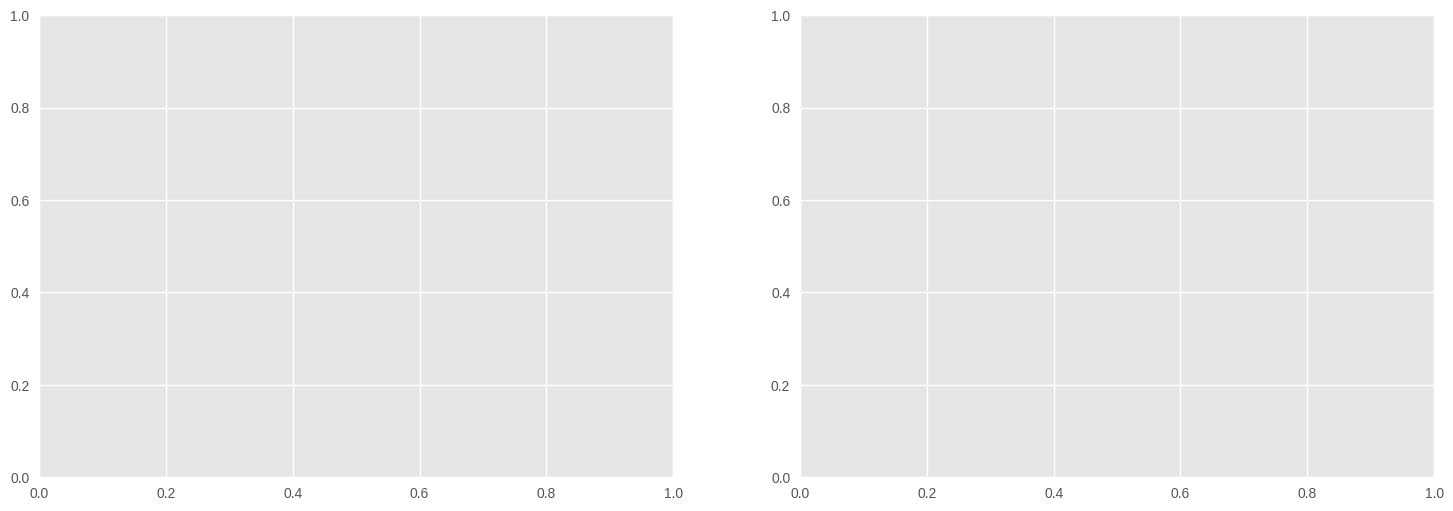

In [23]:
plt.style.use('ggplot')

fig, ax = plt.subplots(len(pars)-1, len(setups), figsize=(18,6), sharex=True)

Nlim = [45, 61, 9]
limdic = {"E":[5e-17, 2e-14, 4], "B":[5e-17, 2e-14, 4], "G":[5e-17, 2e-14, 4], "rhoChi":[2e-18, 5e-14, 6]}

for i in range(len(setups)):
    s= setups[i]
    for j in range(0, len(pars)-1):
        p = pars[j+1]
        for m in models:
            m = str(m)
            ax[j,i].semilogy(results[s][m]["N"], results[s][m][p])
            ConfigurePlot(ax[j,i], Nlim[0], Nlim[1], limdic[p][0], limdic[p][1],
                          nxtick=Nlim[2], nytick=limdic[p][2], yscale="log")
            
plt.plot()

/tmp/ipykernel_174227/4235369249.py:7: RuntimeWarning: invalid value encountered in sqrt
  thetamax, thetamin, thetamid, thetaelc, thetamag = GetBand(list(np.array(Gs)/np.sqrt(np.array(Es)*np.array(Bs))))


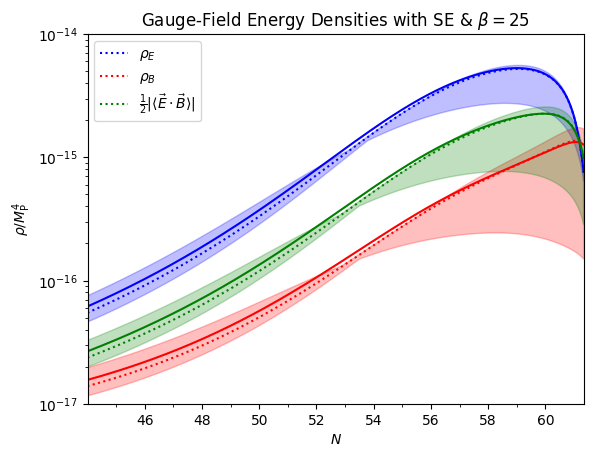

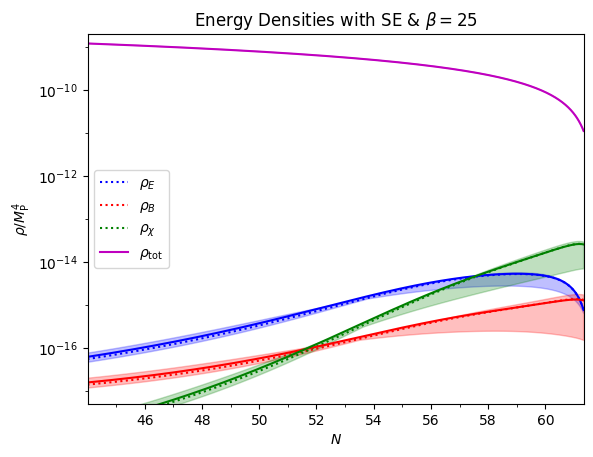

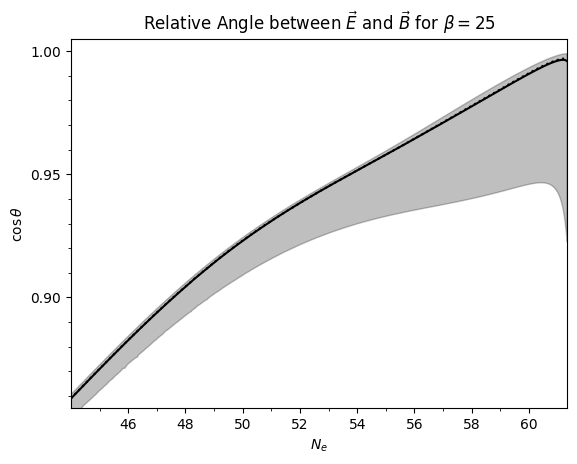

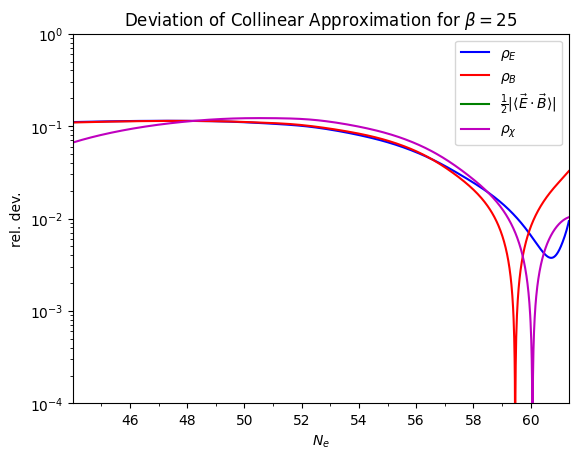

In [18]:
xticks = np.arange(46, 61, 2)
xticksmin = np.arange(45, 60, 2)
yticks = 10**(-1.*np.arange(14, 18, 1))

plt.title("Gauge-Field Energy Densities with SE & " +  r"$\beta=25$")
plt.plot(N, rhoEmid, "b:", label=r"$\rho_E$")
plt.plot(N, rhoBmid, "r:", label=r"$\rho_B$")
plt.plot(N, rhoGmid, "g:", label=r"$\frac{1}{2}|\langle\vec{E}\cdot\vec{B}\rangle|$")
plt.plot(N, E1, "b-")
plt.plot(N, B1, "r-")
plt.plot(N, abs(G1), "g-")
"""plt.plot(N, rhoEelc, "b:")
plt.plot(N, rhoBelc, "r:")
plt.plot(N, rhoGelc, "g:")
plt.plot(N, rhoEmag, "b-")
plt.plot(N, rhoBmag, "r-")
plt.plot(N, rhoGmag, "g-")"""
plt.fill_between(N, rhoEmax, rhoEmin, alpha=0.25, color="b", edgecolor="b")
plt.fill_between(N, rhoBmax, rhoBmin, alpha=0.25, color="r", edgecolor="r")
plt.fill_between(N, rhoGmax, rhoGmin, alpha=0.25, color="g", edgecolor="g")
plt.legend(loc=0)
plt.yscale("log")
plt.ylabel(r"$\rho/M_\mathrm{P}^4$")
plt.xlabel(r"$N$")
plt.ylim(1e-17, 1e-14)
plt.xlim(44, Nmax)
plt.xticks(xticks)
plt.xticks(xticksmin, minor=True)
plt.yticks(yticks)
plt.savefig("SE_Beta25_GaugeFields_CollinearVSfull_Old.png")
plt.show()


#xticks = np.arange(46, 61, 2)
#xticksmin = np.arange(45, 62, 2)
yticks = 10**(-1.*np.arange(10, 18, 2))
yticksmin = 10**(-1.*np.arange(9, 19, 2))

plt.title("Energy Densities with SE & " +  r"$\beta=25$")
plt.plot(N, rhoEmid, "b:", label=r"$\rho_E$")
plt.plot(N, rhoBmid, "r:", label=r"$\rho_B$")
plt.plot(N, rhoCmid, "g:", label=r"$\rho_\chi$")
plt.plot(N, rhoTmid, "m-", label=r"$\rho_{\mathrm{tot}}$")
plt.plot(N, E1, "b-")
plt.plot(N, B1, "r-")
plt.plot(N, rhoChi1, "g-")
plt.fill_between(N, rhoEmax, rhoEmin, alpha=0.25, color="b", edgecolor="b")
plt.fill_between(N, rhoBmax, rhoBmin, alpha=0.25, color="r", edgecolor="r")
plt.fill_between(N, rhoCmax, rhoCmin, alpha=0.25, color="g", edgecolor="g")
plt.fill_between(N, rhoTmax, rhoTmin, alpha=0.25, color="m", edgecolor="m")
plt.legend(loc=0)
plt.yscale("log")
plt.ylabel(r"$\rho/M_\mathrm{P}^4$")
plt.xlabel(r"$N$")
#plt.vlines(61., 1e-20, 1e-8, "k")
plt.ylim(0.5e-17, 2e-9)
plt.xlim(44., Nmax)
plt.xticks(xticks)
plt.xticks(xticksmin, minor=True)
plt.yticks(yticks)
plt.yticks(yticksmin, minor=True, visible=False)
plt.savefig("SE_Beta25_EnergyDensities_CollinearVSfull_Old.png")
plt.show()

plt.title("Relative Angle between " + r"$\vec{E}$ and $\vec{B}$ for $\beta=25$")
yticks = 0.01*np.arange(90, 105, 5)
yticksmin = 0.01*np.arange(86, 101, 1)
plt.fill_between(N, thetamax, thetamin, alpha=0.25, color="k", edgecolor="k")
plt.plot(N, thetamid, "k:", label=r"$\rho_E$")
plt.plot(N, abs(G1)/np.sqrt(E1*B1), "k-")
plt.ylim(0.855, 1.005)
plt.xlim(44., Nmax)
plt.xticks(xticks)
plt.xticks(xticksmin, minor=True)
plt.yticks(yticks)
plt.yticks(yticksmin, labels=None, minor=True)
plt.ylabel(r"$\cos \theta$")
plt.xlabel(r"$N_e$")
plt.savefig("SE_Beta25_Angle_CollinearVSfull_Old.png")
plt.show()

plt.title(r"Deviation of Collinear Approximation for $\beta=25$")
#yticks = 0.02*np.arange(0, 6, 1)
#yticksmin = 0.01*np.arange(1, 10, 2)
plt.plot(N, abs((E1-rhoEmid)/E1), "b-", label=r"$\rho_E$")
plt.plot(N, abs((B1-rhoBmid)/B1), "r-", label=r"$\rho_B$")
plt.plot(N, abs((G1-rhoGmid)/G1), "g-", label=r"$\frac{1}{2}|\langle\vec{E}\cdot\vec{B}\rangle|$")
plt.plot(N, abs((rhoChi1-rhoCmid)/rhoChi1), "m-", label=r"$\rho_\chi$")
plt.ylim(1e-4, 1)
plt.xlim(44., Nmax)
plt.xticks(xticks)
plt.xticks(xticksmin, minor=True)
#plt.yticks(yticks)
#plt.yticks(yticksmin, labels=None, minor=True)
plt.ylabel("rel. dev.")
plt.xlabel(r"$N_e$")
plt.yscale("log")
plt.legend(loc=0)
plt.savefig("SE_Beta25_CollApprox_CollinearVSfull_Old.png")
plt.show()

In [2]:
alpha = 0.
Mpl = 1.
beta = 25.
M = 6e-6*Mpl
phi0 = 15.55*Mpl
dphidt0 = -np.sqrt(2/3)*M*Mpl
ini = {"phi":phi0, "dphi":dphidt0, "delta":1.0, "rhoChi":0.0}
SE = "mix"
ntr = 115
G = GEF(alpha, beta, Mpl, ini, M, ntr, SE, AltDamp=False, approx=True)
G.RunGEF(t1=120.)

Elapsed time: 78.7481 seconds


In [13]:
N4 = G.vals["N"]
xi4 = G.vals["xi"]
#xieff4 = G.vals["xieff"]
#delta4 = G.vals["delta"]
H4 = G.vals["H"]
rhoChi1 = G.vals["rhoChi"]
E4 = G.vals["E"]
B4 = G.vals["B"]
G4 = G.vals["G"]

file2 = "/home/users/rfreiher/Documents/Axion_Inflation/GEF/Out/GEF_Beta25.0_SEmix.dat"
input_df = pd.read_table(file2, sep=",")
data = input_df.values
print(data.shape)

N1 = data[1:,6]
xi1 = data[1:,-2]
H1 = data[1:,-5]
E1 = data[1:,-8]
B1 = data[1:,-7]
G1 = data[1:,-6]
rhoChi1 = data[1:,4]


(6669, 17)
